# **PROJECT: BOOK ANALYSIS**

---
## State the Problem

I want to identify the topics of books, from the Gutenberg Project, before tomorrow, to guide reading selection.

---
## Prepare the Tools

### Check the Resources

* Python (https://docs.python.org/3.11/)
* Beautiful Soup (https://beautiful-soup-4.readthedocs.io/en/latest/)
* Natural Language ToolKit (https://nltk.readthedocs.io/en/latest/)
* Matplotlib (https://matplotlib.org/stable/index.html)
* Wikipedia (https://fr.wikipedia.org/wiki/Projet_Gutenberg)

### Import Libraries and Modules

In [8]:
# Import libraries and modules

# To check my work environment
import os
# To scrape webpages
import requests
from bs4 import BeautifulSoup
# To use NLP
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("stopwords")
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Define Functions

In [10]:
# Define functions

def check_directory():
    """
    Purpose:
        Check the current directory and its contents
    Parameters:
        None
    Result:
        Print of the current directory and its contents
    """
    
    try:
        current_directory = os.getcwd()
        print("CURRENT DIRECTORY")
        print()
        print(current_directory)
        print()
        print()
        print("FILES IN CURRENT DIRECTORY")
        print()
        files = os.listdir(current_directory)
        if files:
            for file in files:
                print(file)
            print()
            print()
        else:
            print("Files not found")
            print()
    except Exception as e:
        print(f"Error message: {e}")
        return None
        print()


def check_text(text, return_statistics_dict = True):
    """
    Purpose: 
        Calculate and Print statistics about a text
    Parameters:
        "text" as a string
        "return_statistics_dict" as a boolean
    Results: 
        Print of statistics about the text
        A dictionary containing the statistics about the text (optional)
    """
    try:
        first_500_characters = text[:500]
        last_500_characters = text[-500:]
        text_length = len(text)
        words_list = word_tokenize(text)
        sentences_list = sent_tokenize(text)
        words_count = len(words_list)
        words_lengths_list = [len(word) for word in words_list]
        words_minimum_length = min(words_lengths_list)
        words_maximum_length = max(words_lengths_list)
        words_average_length = sum(words_lengths_list) / len(words_lengths_list)        
        words_frequencies = FreqDist(words_list)
        most_common_words = words_frequencies.most_common(10)
        sentences_count = len(sentences_list)
        sentences_lengths_list = [len(word_tokenize(sentence)) for sentence in sentences_list]
        sentences_minimum_length = min(sentences_lengths_list)
        sentences_maximum_length = max(sentences_lengths_list)
        sentences_average_length = sum(sentences_lengths_list) / len(sentences_lengths_list) 
        
        statistics_dict = {
            "first_500_characters": first_500_characters,
            "last_500_characters": last_500_characters,
            "text_length": text_length,
            "words_list": words_list,
            "sentences_list": sentences_list,
            "words_count": words_count,
            "words_lengths_list": words_lengths_list,
            "words_minimum_length": words_minimum_length,
            "words_maximum_length": words_maximum_length,
            "words_average_length": words_average_length,    
            "words_frequencies": words_frequencies,
            "most_common_words": most_common_words,
            "sentences_count": sentences_count,
            "sentences_lengths_list": sentences_lengths_list,
            "sentences_minimum_length": sentences_minimum_length,
            "sentences_maximum_length": sentences_maximum_length,
            "sentences_average_length": sentences_average_length
        }
        if return_statistics_dict == True:
            return statistics_dict
    
        else:
            print("FIRST 500 CHARACTERS")
            print(first_500_characters)
            print()
            print("LAST 500 CHARACTERS")
            print(last_500_characters)
            print()
            print("STATISTICS OF THE UNPROCESSED TEXT")
            print(f"Count of characters: {text_length}")
            print(f"Count of words: {words_count}")
            print(f"Count of most common words: {most_common_words}")
            print(f"Minimum length of words: {words_minimum_length} characters")
            print(f"Maximum length of words: {words_maximum_length} characters")
            print(f"Average length of words: {words_average_length:.0f} characters")
            print(f"Count of sentences: {sentences_count}")
            print(f"Minimum length of sentences: {sentences_minimum_length} words")
            print(f"Maximum length of sentences: {sentences_maximum_length} words")
            print(f"Average length of sentences: {sentences_average_length:.0f} words")
            print()

    except Exception as e:
        print(f"Error message: {e}")
        return None


def preprocess_text(text):
    """
    Purpose: 
        Preprocess a text to remove punctuation and stopwords
    Parameters:
        "text" as a string
        "return_statistics_dict" as a boolean
    Result: 
        A string containing the preprocessed text
    """
    try:
        lowercase_text = text.lower()
        text_without_punctuation = re.sub(r"[^\w\s'&]", "", lowercase_text)
        words_list = word_tokenize(text_without_punctuation)
        english_stopwords = set(stopwords.words("english"))
        no_stopwords_no_punctuation_words_list = [word for word in words_list if word not in english_stopwords]
        no_stopwords_no_punctuation_text = " ".join(no_stopwords_no_punctuation_words_list)
        return no_stopwords_no_punctuation_text
    except Exception as e:
        print(f"Error message: {e}")
        return None


def lemmatize_text(text):
    """
    Purpose: 
        Lemmatize a text and remove stopwords
    Parameter:
        "text" as a string
    Results: 
        A string containing the lemmatized text
    """
    try:
        spacy_model_instance = spacy.load("en_core_web_sm")
        spacy_model_instance_doc = spacy_model_instance(text)
        english_stopwords = set(stopwords.words("english"))
        lemmatized_words_list = [
            word.lemma_ for word in spacy_model_instance_doc
            if word.lemma_ not in english_stopwords
        ]
        lemmatized_text = " ".join(lemmatized_words_list)
        return lemmatized_text
        
    except Exception as e:
        print(f"Error message: {e}")
        return None

### Check the Current Directory

In [12]:
# Check the directory
check_directory()

CURRENT DIRECTORY

C:\Users\willi\data_resources\portfolio\book_analysis_project


FILES IN CURRENT DIRECTORY

.ipynb_checkpoints
book_analysis_project.ipynb




---
## Collect the Data

### On the Gutenberg Project Wiki

In [15]:
# Access the HTML content
gutenberg_wiki_url = "https://en.wikipedia.org/wiki/Project_Gutenberg"

try:
    gutenberg_wiki_response = requests.get(gutenberg_wiki_url)
    if gutenberg_wiki_response.status_code == 200:
        html_content = BeautifulSoup(gutenberg_wiki_response.text, "html.parser")
        print(html_content.prettify()) 
    else:
        print(f"Error: Status code {gutenberg_wiki_response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Error message: {e}")

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Project Gutenberg - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disa

In [16]:
# Access the content of the paragraphs
content_div_content = html_content.find("div", class_ = "mw-content-ltr mw-parser-output") 
content_div_paragraphs = content_div_content.find_all("p")
paragraphs_list = [paragraph.text for paragraph in content_div_paragraphs]
paragraphs_list[1:22]

['Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, as well as to "encourage the creation and distribution of eBooks."[2] It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library.[3] Most of the items in its collection are the full texts of books or individual stories in the public domain. All files can be accessed for free under an open format layout, available on almost any computer. As of 13\xa0February\xa02024[update], Project Gutenberg had reached 70,000 items in its collection of free eBooks.[4]\n',
 'The releases are available in plain text as well as other formats, such as HTML, PDF, EPUB, MOBI, and Plucker wherever possible. Most releases are in the English language, but many non-English works are also available. There are multiple affiliated projects that provide additional content, including region- and language-specific works. Project Gutenberg is closely affiliated with Distributed Proofreaders, an Inter

In [17]:
# Check file names in the Gutenberg corpus of the NLTK library
nltk_gutenberg_corpus = gutenberg.fileids()
print("FILE NAMES IN THE GUTENBERG CORPUS")
for file_name in nltk_gutenberg_corpus:
    print(file_name)

FILE NAMES IN THE GUTENBERG CORPUS
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


### On "Alice in Wonderland" by Lewis Caroll

In [19]:
# Access the text
alice_raw_text = gutenberg.raw("carroll-alice.txt")
check_text(alice_raw_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an

LAST 500 CHARACTERS
ister of hers
would, in the after-time, be herself a grown woman; and how she would
keep, through all her riper years, the simple and loving heart of her
childhood: and how she would gather about her other little children, and
make THEIR eyes bright and eager with many a strange tale, perhaps even
with the dream of Wonderland of long ago: and how she would feel with
all their simple sorrows, and find a pleasure in all their simple joys,
remembering her 

### On "Moby Dick" by Herman Melville

In [21]:
# Access the text
moby_raw_text = gutenberg.raw("melville-moby_dick.txt")
check_text(moby_raw_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teac

LAST 500 CHARACTERS
uoy shot
lengthwise from the sea, fell over, and floated by my side.  Buoyed
up by that coffin, for almost one whole day and night, I floated on a
soft and dirgelike main.  The unharming sharks, they glided by as if
with padlocks on their mouths; the savage sea-hawks sailed with
sheathed beaks.  On the second day, a sail drew near, nearer, and
picked me up at last.  It was the devious-cruising Rachel, that in
her retracing search after her missing children, only fou

### On "Leaves of Grass" by Walt Whitman

In [23]:
# Access the text
leaves_raw_text = gutenberg.raw("whitman-leaves.txt")
check_text(leaves_raw_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I 

LAST 500 CHARACTERS
aration--Good-bye my Fancy.

Yet let me not be too hasty,
Long indeed have we lived, slept, filter'd, become really blended
    into one;
Then if we die we die together, (yes, we'll remain one,)
If we go anywhere we'll go together to meet what happens,
May-be we'll be better off and blither, and learn something,
May-be it is yourself now really ushering me to the true songs, (who
    knows?)
May-be it is you the mortal knob really undoing, turning--so n

---
## Clean and Prepare the Data

### On the Gutenberg Project Wiki

In [26]:
# Join the paragraphs
joined_paragraphs = "\n".join(paragraphs_list[1:22])
print(joined_paragraphs)

Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, as well as to "encourage the creation and distribution of eBooks."[2] It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library.[3] Most of the items in its collection are the full texts of books or individual stories in the public domain. All files can be accessed for free under an open format layout, available on almost any computer. As of 13 February 2024[update], Project Gutenberg had reached 70,000 items in its collection of free eBooks.[4]

The releases are available in plain text as well as other formats, such as HTML, PDF, EPUB, MOBI, and Plucker wherever possible. Most releases are in the English language, but many non-English works are also available. There are multiple affiliated projects that provide additional content, including region- and language-specific works. Project Gutenberg is closely affiliated with Distributed Proofreaders, an Internet-based com

In [27]:
# Process the text
gutenberg_wiki_content = re.sub(r"\[\d+\]|\[update\]", "", joined_paragraphs)
print(gutenberg_wiki_content)

Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, as well as to "encourage the creation and distribution of eBooks." It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of books or individual stories in the public domain. All files can be accessed for free under an open format layout, available on almost any computer. As of 13 February 2024, Project Gutenberg had reached 70,000 items in its collection of free eBooks.

The releases are available in plain text as well as other formats, such as HTML, PDF, EPUB, MOBI, and Plucker wherever possible. Most releases are in the English language, but many non-English works are also available. There are multiple affiliated projects that provide additional content, including region- and language-specific works. Project Gutenberg is closely affiliated with Distributed Proofreaders, an Internet-based community for proofr

### On "Alice in Wonderland" by Lewis Caroll

In [29]:
# Preprocess the text
alice_preprocessed_text = preprocess_text(alice_raw_text)
check_text(alice_preprocessed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
alice 's adventures wonderland lewis carroll 1865 chapter rabbithole alice beginning get tired sitting sister bank nothing twice peeped book sister reading pictures conversations 'and use book ' thought alice 'without pictures conversation' considering mind well could hot day made feel sleepy stupid whether pleasure making daisychain would worth trouble getting picking daisies suddenly white rabbit pink eyes ran close nothing remarkable alice think much way hear rabbit say 'oh dear oh dear shall

LAST 500 CHARACTERS
l cries voice shepherd boyand sneeze baby shriek gryphon queer noises would change knew confused clamour busy farmyardwhile lowing cattle distance would take place mock turtle's heavy sobs lastly pictured little sister would aftertime grown woman would keep riper years simple loving heart childhood would gather little children make eyes bright eager many strange tale perhaps even dream wonderland long ago would feel simple sorrows find pleasure simple j

In [30]:
# Lemmatize the text
alice_lemmatized_text = lemmatize_text(alice_preprocessed_text)
check_text(alice_lemmatized_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
alice 's adventure wonderland lewis carroll 1865 chapter rabbithole alice beginning get tired sit sister bank nothing twice peep book sister read picture conversation ' use book ' thought alice ' without picture conversation ' consider mind well could hot day make feel sleepy stupid whether pleasure make daisychain would worth trouble getting pick daisy suddenly white rabbit pink eye run close nothing remarkable alice think much way hear rabbit say ' oh dear oh dear shall late ' thought afterwar

LAST 500 CHARACTERS
ell queen 's shrill cry voice shepherd boyand sneeze baby shriek gryphon queer noise would change know confused clamour busy farmyardwhile lowing cattle distance would take place mock turtle 's heavy sob lastly picture little sister would aftertime grow woman would keep riper year simple love heart childhood would gather little child make eye bright eager many strange tale perhaps even dream wonderland long ago would feel simple sorrow find pleasure sim

In [31]:
# Process the text
alice_processed_text = re.sub(r"\'s|\'", "", alice_lemmatized_text)
check_text(alice_processed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
alice  adventure wonderland lewis carroll 1865 chapter rabbithole alice beginning get tired sit sister bank nothing twice peep book sister read picture conversation  use book  thought alice  without picture conversation  consider mind well could hot day make feel sleepy stupid whether pleasure make daisychain would worth trouble getting pick daisy suddenly white rabbit pink eye run close nothing remarkable alice think much way hear rabbit say  oh dear oh dear shall late  thought afterwards occur

LAST 500 CHARACTERS
eepbell queen  shrill cry voice shepherd boyand sneeze baby shriek gryphon queer noise would change know confused clamour busy farmyardwhile lowing cattle distance would take place mock turtle  heavy sob lastly picture little sister would aftertime grow woman would keep riper year simple love heart childhood would gather little child make eye bright eager many strange tale perhaps even dream wonderland long ago would feel simple sorrow find pleasure sim

### On "Moby Dick" by Herman Melville

In [33]:
# Preprocess the text
moby_preprocessed_text = preprocess_text(moby_raw_text)
check_text(moby_preprocessed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
moby dick herman melville 1851 etymology supplied late consumptive usher grammar school pale usherthreadbare coat heart body brain see ever dusting old lexicons grammars queer handkerchief mockingly embellished gay flags known nations world loved dust old grammars somehow mildly reminded mortality take hand school others teach name whalefish called tongue leaving ignorance letter h almost alone maketh signification word deliver true hackluyt whale sw dan hval animal named roundness rolling dan h

LAST 500 CHARACTERS
is slowly wheeling circle like another ixion revolve till gaining vital centre black bubble upward burst liberated reason cunning spring owing great buoyancy rising great force coffin lifebuoy shot lengthwise sea fell floated side buoyed coffin almost one whole day night floated soft dirgelike main unharming sharks glided padlocks mouths savage seahawks sailed sheathed beaks second day sail drew near nearer picked last deviouscruising rachel retracing s

In [34]:
# Lemmatize the text
moby_lemmatized_text = lemmatize_text(moby_preprocessed_text)
check_text(moby_lemmatized_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
moby dick herman melville 1851 etymology supply late consumptive usher grammar school pale usherthreadbare coat heart body brain see ever dust old lexicon grammar queer handkerchief mockingly embellish gay flag know nation world love dust old grammar somehow mildly remind mortality take hand school teach name whalefish call tongue leave ignorance letter h almost alone maketh signification word deliver true hackluyt whale sw dan hval animal name roundness roll dan hvalt arch vault webster 's dict

LAST 500 CHARACTERS
wards buttonlike black bubble axis slowly wheel circle like another ixion revolve till gain vital centre black bubble upward burst liberated reason cunning spring owe great buoyancy rise great force coffin lifebuoy shoot lengthwise sea fall float side buoy coffin almost one whole day night float soft dirgelike main unharming shark glide padlock mouth savage seahawks sail sheathe beak second day sail draw near nearer pick last deviouscruising rachel retr

In [35]:
# Process the text
moby_processed_text = re.sub(r"\'s|\'", "", moby_lemmatized_text)
check_text(moby_processed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
moby dick herman melville 1851 etymology supply late consumptive usher grammar school pale usherthreadbare coat heart body brain see ever dust old lexicon grammar queer handkerchief mockingly embellish gay flag know nation world love dust old grammar somehow mildly remind mortality take hand school teach name whalefish call tongue leave ignorance letter h almost alone maketh signification word deliver true hackluyt whale sw dan hval animal name roundness roll dan hvalt arch vault webster  dictio

LAST 500 CHARACTERS
wards buttonlike black bubble axis slowly wheel circle like another ixion revolve till gain vital centre black bubble upward burst liberated reason cunning spring owe great buoyancy rise great force coffin lifebuoy shoot lengthwise sea fall float side buoy coffin almost one whole day night float soft dirgelike main unharming shark glide padlock mouth savage seahawks sail sheathe beak second day sail draw near nearer pick last deviouscruising rachel retr

### On "Leaves of Grass" by Walt Whitman

In [37]:
# Preprocess the text
leaves_preprocessed_text = preprocess_text(leaves_raw_text)
check_text(leaves_preprocessed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
leaves grass walt whitman 1855 come said soul verses body let us write one return long long hence spheres group mates chants resuming tallying earth 's soil trees winds tumultuous waves ever pleas 'd smile may keep ever ever yet verses owningas first signing soul body set name walt whitman book inscriptions one'sself sing one'sself sing simple separate person yet utter word democratic word enmasse physiology top toe sing physiognomy alone brain alone worthy muse say form complete worthier far fe

LAST 500 CHARACTERS
r may ever see goodbye fancy lastlet look back moment slower fainter ticking clock exit nightfall soon heartthud stopping long lived joy 'd caress 'd together delightfulnow separationgoodbye fancy yet let hasty long indeed lived slept filter 'd become really blended one die die together yes 'll remain one go anywhere 'll go together meet happens maybe 'll better blither learn something maybe really ushering true songs knows maybe mortal knob really undo

In [38]:
# Lemmatize the text
leaves_lemmatized_text = lemmatize_text(leaves_preprocessed_text)
check_text(leaves_lemmatized_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
leave grass walt whitman 1855 come say soul verses body let write one return long long hence sphere group mate chant resume tally earth 's soil tree wind tumultuous wave ever plea would smile may keep ever ever yet verses owningas first signing soul body set name walt whitman book inscription one'sself sing one'sself sing simple separate person yet utter word democratic word enmasse physiology top toe sing physiognomy alone brain alone worthy muse say form complete worthy far female equally male

LAST 500 CHARACTERS
 ' go away know fortune whether may ever see goodbye fancy lastlet look back moment slow fainter tick clock exit nightfall soon heartthud stop long live joy would caress 'd together delightfulnow separationgoodbye fancy yet let hasty long indeed live slept filter would become really blend one die die together yes remain one go anywhere go together meet happen maybe well blither learn something maybe really usher true song know maybe mortal knob really u

In [39]:
# Process the text
leaves_processed_text = re.sub(r"\'s|\'", "", leaves_lemmatized_text)
check_text(leaves_processed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
leave grass walt whitman 1855 come say soul verses body let write one return long long hence sphere group mate chant resume tally earth  soil tree wind tumultuous wave ever plea would smile may keep ever ever yet verses owningas first signing soul body set name walt whitman book inscription oneself sing oneself sing simple separate person yet utter word democratic word enmasse physiology top toe sing physiognomy alone brain alone worthy muse say form complete worthy far female equally male sing 

LAST 500 CHARACTERS
ve  go away know fortune whether may ever see goodbye fancy lastlet look back moment slow fainter tick clock exit nightfall soon heartthud stop long live joy would caress d together delightfulnow separationgoodbye fancy yet let hasty long indeed live slept filter would become really blend one die die together yes remain one go anywhere go together meet happen maybe well blither learn something maybe really usher true song know maybe mortal knob really u

---
## Explore and Analyze the Data

### On "Alice in Wonderland" by Lewis Caroll

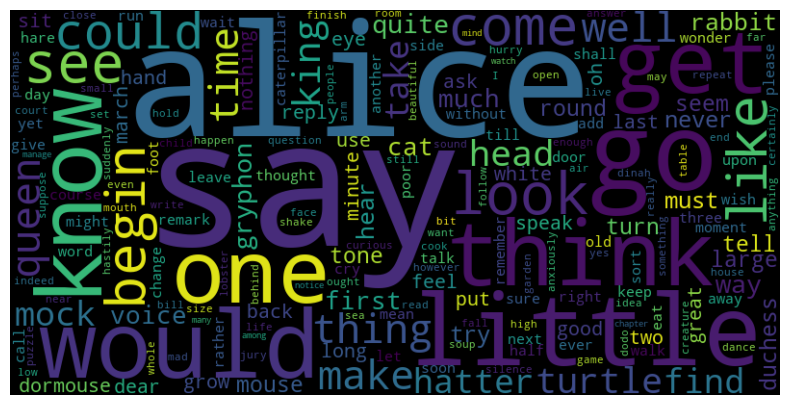

In [42]:
# Generate a word cloud
alice_text_statistics = check_text(alice_processed_text, return_statistics_dict = True)
alice_words_frequencies = alice_text_statistics["words_frequencies"]
alice_wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = "black"
).generate_from_frequencies(alice_words_frequencies)
plt.figure(figsize = (15, 5))
plt.imshow(alice_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Looking at this word cloud of the book "Alice in Wonderland" by Lewis Caroll,  I suppose that:
* it is a story ("say", "would")
* it involves a girl nammed Alice ("Alice")
* it involves little things ("little")
* it is about an adventure ("go", "come", "get",...)
* it happens in a medieval-fantasy environment ("king", "queen", "gryphoon",...)
* it involves animals ("turtle", "rabbit", "cat",...)

### On "Moby Dick" by Herman Melville

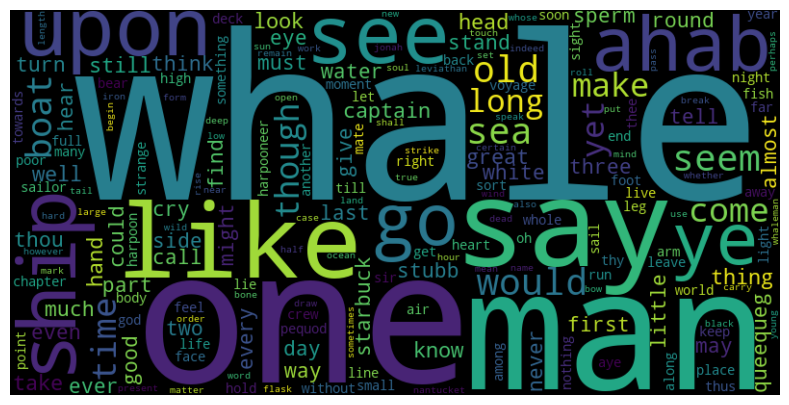

In [45]:
# Generate a word cloud
moby_text_statistics = check_text(moby_processed_text, return_statistics_dict = True)
moby_words_frequencies = moby_text_statistics["words_frequencies"]
moby_wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = "black"
).generate_from_frequencies(moby_words_frequencies)
plt.figure(figsize = (15, 5))
plt.imshow(moby_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Looking at this word cloud of the book "Moby Dick" by Herman Melville,  I suppose that:
* it is a story ("say", "would")
* it involves a whale and a man ("one", "whale", "man")
* it is about an adventure ("go", "come" , "make",...)
* it happens in a marine environment ("ship", "sea", "boat",...)

### On "Leaves of Grass" by Walt Whitman

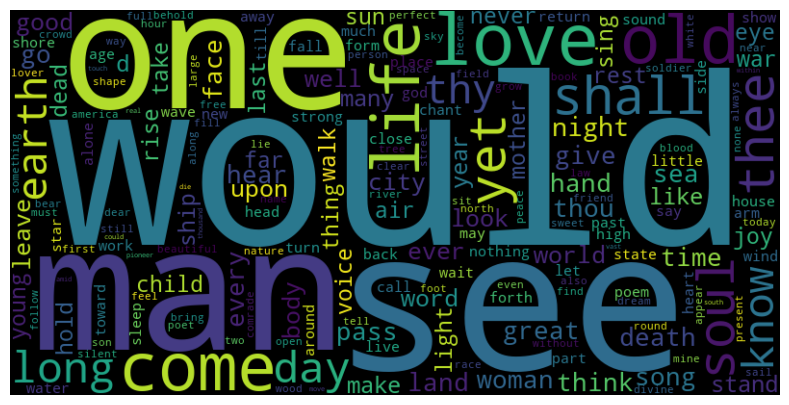

In [48]:
# Generate a word cloud
leaves_text_statistics = check_text(leaves_processed_text, return_statistics_dict = True)
leaves_words_frequencies = leaves_text_statistics["words_frequencies"]
leaves_wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = "black"
).generate_from_frequencies(leaves_words_frequencies)
plt.figure(figsize = (15, 5))
plt.imshow(leaves_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [49]:
# Size the figure
plt.figure(figsize = (12.5, 7.5))

# Plot a Correlation Heatmap (without insignificant correlations)
correlation_matrix = weather_cleaned_df.select_dtypes(include = ["number"]).corr()
mask = np.abs(correlation_matrix) <= 0.50
correlation_heatmap = sns.heatmap(correlation_matrix,
                                  mask = mask,
                                  fmt=".1f",
                                  annot = True,
                                  annot_kws = {"size": 7.5},
                                  linecolor = "grey",
                                  linewidth = 0.5,
                                  vmin = -1,
                                  vmax = 1,                                  
                                  cmap = "coolwarm")

# Show the figure
plt.tight_layout()
plt.title("Correlation Heatmap", fontsize = 10, fontweight = "bold")
plt.show()

NameError: name 'weather_cleaned_df' is not defined

<Figure size 1250x750 with 0 Axes>

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "temperatures" (max, mean, and min). 
This indicates that apparent temperatures increase with actual temperatures. 
This makes sense because apparent temperatures are influenced by actual temperatures and other factors affecting temperatures perception.

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "shortwave_radiation_sum". 
This indicates that apparent temperatures increase with higher shortwave solar radiation. 
This makes sense because shortwave radiation heats the Earth's surface and atmosphere.

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "global_tilted_irradiance". 
This indicates that apparent temperatures increase with higher global tilted irradiance. 
This makes sense because global tilted irradiance measures the solar energy absorbed by the ground and surfaces.

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "soil_temperatures" (0 to 100 cm). 
This indicates that apparent temperatures increase with soil temperatures.
This makes sense because the soil absorbs solar energy and releases heat into the atmosphere.

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "dew_point_2m". 
This indicates that apparent temperatures increase with higher dew point.
This makes sense because the dew point reflects moisture levels in the air.

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "vapour_pressure_deficit".
This indicates that apparent temperatures increase with higher vapor pressure deficit.
This makes sense because vapor pressure deficit is the difference between the moisture the atmosphere can hold and what is actually present.

* Very strong positive correlation between "apparent_temperatures" (max, mean, and min) and "et0_fao_evapotranspiration".
This indicates that apparent temperatures increase with higher evapotranspiration.
This makes sense because evapotranspiration is the evaporation of water from the ground and plants caused by the heat and solar energy.

* Very strong negative correlation between "apparent_temperatures" (max, mean, and min) and "soil_moisture" (0 to 100 cm). 
This indicates that apparent temperatures increase with lower soil moisture. 
This makes sense because the soil absorbs solar energy, heats up, evaporates moisture (cooling down), then releases heat into the atmosphere.

* Strong positive correlation between "apparent_temperatures" (max, mean, and min) and "daylight_duration". 
This indicates that apparent temperatures increase with longer daylight durations. 
This makes sense because daylight durations influence how long the Earth's surface is exposed to solar energy.

* Strong positive correlation between "apparent_temperatures" (max, mean, and min) and "sunshine_duration". 
This indicates that apparent temperatures increase with longer sunshine durations. 
This makes sense because sunshine durations influence how long the Earth's surface is exposed to direct solar energy.

* Strong positive correlation between "apparent_temperatures" (max, mean, and min) and "direct_radiation". 
This indicates that apparent temperatures increase with higher direct radiation.
This makes sense because direct radiation heats the Earth's surface and atmosphere.

* Strong positive correlation between "apparent_temperatures" (max, mean, and min) and "direct_normal_irradiance". 
This indicates that apparent temperatures increase with higher direct normal irradiance.
This makes sense because direct normal irradiance measures the solar energy directly hitting the Earth's surface.

* Strong negative correlation between "apparent_temperatures" (max, mean, and min) and "cloud_cover". 
This indicates that apparent temperatures increase with lower cloud cover.
This makes sense because cloud cover allows or blocks some solar radiation to reach the Earth's surface.

* Strong negative correlation between "apparent_temperatures" (max, mean, and min) and "relative_humidity_2m".
This indicates that apparent temperatures increase with lower relative humidity.
This makes sense because humidity absorbs heat.

In [ ]:
# Filter weather data by year
year_2019_weather_cleaned_df = weather_cleaned_df[weather_cleaned_df["year"] == 2019]
year_2020_weather_cleaned_df = weather_cleaned_df[weather_cleaned_df["year"] == 2020]
year_2021_weather_cleaned_df = weather_cleaned_df[weather_cleaned_df["year"] == 2021]
year_2022_weather_cleaned_df = weather_cleaned_df[weather_cleaned_df["year"] == 2022]
year_2023_weather_cleaned_df = weather_cleaned_df[weather_cleaned_df["year"] == 2023]
year_2024_weather_cleaned_df = weather_cleaned_df[weather_cleaned_df["year"] == 2024]

# List the years and their corresponding dataframes
years_of_weather_cleaned_df = ["2024 (partial year)", "2023", "2022", "2021", "2020", "2019 (partial year)"]
weather_cleaned_dfs_by_year = [
    year_2024_weather_cleaned_df,
    year_2023_weather_cleaned_df,
    year_2022_weather_cleaned_df,     
    year_2021_weather_cleaned_df,
    year_2020_weather_cleaned_df, 
    year_2019_weather_cleaned_df
]

In [ ]:
# Loop through each year and its corresponding dataframe to plot boxplots of apparent temperatures distributions
for year_of_weather_cleaned_df, weather_cleaned_df_by_year in zip(years_of_weather_cleaned_df, weather_cleaned_dfs_by_year):
    visualize_boxplots_of_apparent_temperatures_distribution(year_of_weather_cleaned_df, weather_cleaned_df_by_year)

In [ ]:
# Loop through each year and its corresponding dataframe to plot histograms of apparent temperatures distributions frequencies
for year_of_weather_cleaned_df, weather_cleaned_df_by_year in zip(years_of_weather_cleaned_df, weather_cleaned_dfs_by_year):
    visualize_histograms_of_apparent_temperatures_distribution_frequencies(
        year_of_weather_cleaned_df, 
        {
            "Maximum Apparent Temperature": ("red", weather_cleaned_df_by_year["apparent_temperature_max"]),
            "Mean Apparent Temperature": ("grey", weather_cleaned_df_by_year["apparent_temperature_mean"]),
            "Minimum Apparent Temperature": ("blue", weather_cleaned_df_by_year["apparent_temperature_min"])
        }
    )

In [ ]:
# Loop through each year and its corresponding dataframe to comment the distributions
for year_of_weather_cleaned_df, weather_cleaned_df_by_year in zip(years_of_weather_cleaned_df, weather_cleaned_dfs_by_year):
    distribution = check_distribution(weather_cleaned_df_by_year, "apparent_temperature_mean")
    print(f"For the year {year_of_weather_cleaned_df}:")
    print(f"The Range of mean apparent temperatures is {distribution['range']}°C.")
    print(f"The Spread (aka. IQR) is {distribution['spread']}°C.")
    print(f"The Median is {distribution['median']}°C.")
    print(f"The Mean is {distribution['mean']}°C.")
    print(f"The Mode(s) is(are) {distribution['rounded_modes_list']}°C.")
    print(f"There are {distribution['outliers_count']} Outliers.")
    print(f"The Skewness is {distribution['skewness']}.")
    print()

In [ ]:
# Loop through each year and its corresponding dataframe to plot lineplots of apparent temperatures patterns
for year_of_weather_cleaned_df, weather_cleaned_df_by_year in zip(years_of_weather_cleaned_df, weather_cleaned_dfs_by_year):
    visualize_lineplots_of_apparent_temperatures_patterns(year_of_weather_cleaned_df, weather_cleaned_df_by_year)

Looking at this word cloud of the book "Leaves of Grass" by Walt Whitman,  I suppose that:
* it is a story ("would")
* it involves a man ("man")
* it is about love, life and spirituality ("love", "life" , "soul",...)
* it happens in a distant past ("thee", "thy", "thou")

---
## Solve the Problem

I identified the topics of books, from the Gutenberg Project, before tomorrow, to guide reading selection.